In [1]:
setwd('/import/liujing/data2/')

###  valcano

In [2]:
diff = read.table('./sample74.pro.txt',header =T,sep = '\t',fill =NA)

In [3]:
diff = diff[!duplicated(diff$GeneName),]

In [4]:
head(diff,3)

,GeneName,Biotype,Gene,CI_normalize,CRTL_normalize,FoldChange,Log2FoldChange,pval,padj,Up.Down,Significant
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,TSPAN6,protein_coding,ENSG00000000003,3.922491,4.90077945,0.8003811,-0.3212410,0.286507903,0.74424720,down,no
2,TNMD,protein_coding,ENSG00000000005,0.000000,0.03036792,NA,NA,NA,NA,,
3,DPM1,protein_coding,ENSG00000000419,349.041250,269.58626190,1.2947294,0.3726506,0.002837602,0.07255005,up,no


In [5]:
padj = 0.05
foldChange = 0.5

diff$group = as.factor(ifelse(diff$padj < padj & abs(diff$Log2FoldChange	) > foldChange, 
                                 ifelse(diff$Log2FoldChange	> foldChange ,'Up','Down'),'NoSignifi'))
table(diff$group)


     Down NoSignifi        Up 
      458     17381        67 

In [6]:
table(diff$group)


     Down NoSignifi        Up 
      458     17381        67 

In [7]:
res = na.omit(diff)

In [8]:
write.csv(res,file = 'sample75.diffgene.csv')

In [9]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [10]:
    top_5 <- bind_rows(   
          res %>%
            filter(group == 'Up') %>%
            arrange(padj, desc(Log2FoldChange)) %>%
            head(0),
          res %>%
            filter(group == 'Down') %>%
            arrange(padj, desc(Log2FoldChange)) %>%
            head(0)
        )

In [11]:
library(ggpubr)
library(ggplot2)
    library(dplyr)
    library(ggrepel)
    library(ggplot2)
    library(cowplot)

Warning message:
"package 'ggpubr' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'ggrepel' was built under R version 4.2.3"
Warning message:
"package 'cowplot' was built under R version 4.2.3"

Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend




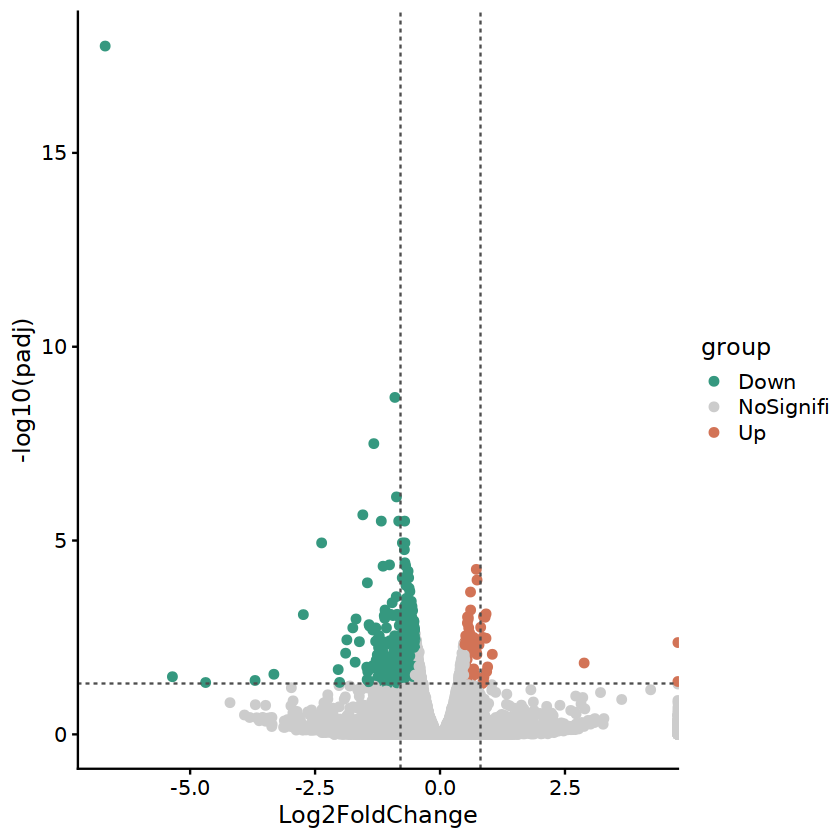

In [12]:
 ggplot(data=res,aes(x=Log2FoldChange,y=-log10(padj)))+
    geom_point(aes(color=group),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    geom_vline(xintercept = c(-.8,.8),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= Log2FoldChange,y= -log10(padj),label= rownames(top_5)))+
    scale_color_manual(values = c("#35987F","grey80","#D27356"))+
    theme_half_open() 

In [13]:
library(ggplot2)

In [14]:
ggsave('Figure1.74sample.valano.pdf',width = 8,height = 8)

In [15]:
library(clusterProfiler)
library(org.Hs.eg.db)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProf

In [16]:
jiaoji = diff %>%  dplyr::filter(group != 'NoSignifi') %>%  dplyr::select(GeneName)

In [17]:
gene_symbol <- bitr(geneID = jiaoji$GeneName,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Hs.eg.db,  
                   ont = "ALL",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.05,  
                   readable = TRUE) 

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = jiaoji$GeneName, fromType = "SYMBOL", toType = c("ENTREZID"), :
"7.62% of input gene IDs are fail to map..."


In [18]:
 BP %>% filter(ONTOLOGY	 == 'BP') %>% head(10) -> bp
 BP %>% filter(ONTOLOGY	 == 'CC') %>% head(10) -> cc
 BP %>% filter(ONTOLOGY	 == 'MF') %>% head(10) -> mf

In [19]:
go = rbind(bp,cc,mf)

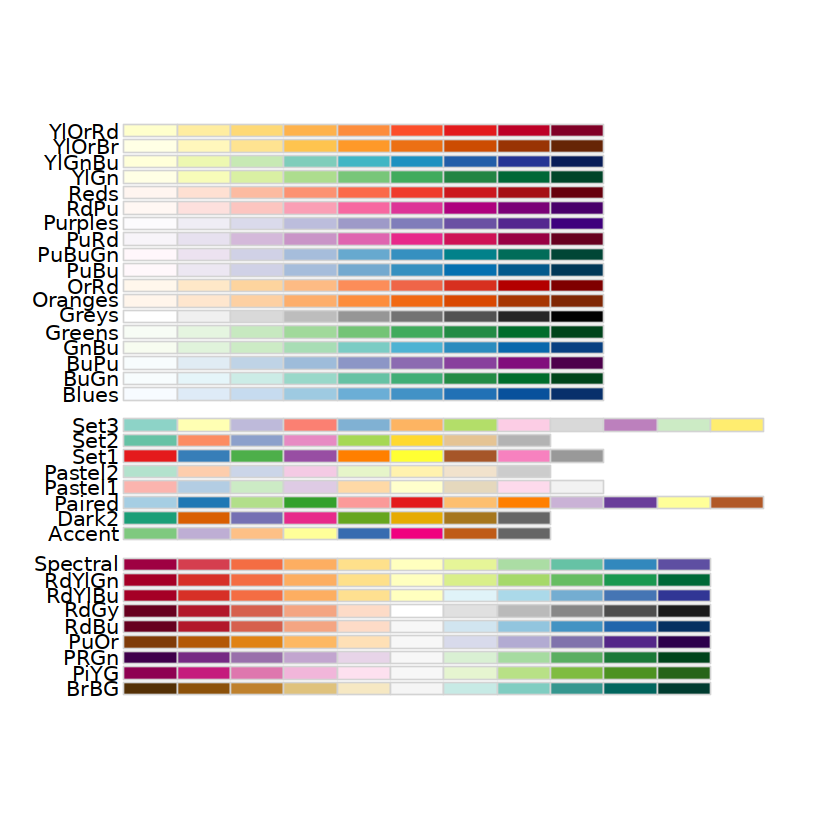

In [20]:
library(ggplot2)
library(RColorBrewer)
display.brewer.all()
color <- brewer.pal(3,"Dark2")
colorl <- rep(color,each=10)
go$Description<- factor(go$Description,levels=go$Description)

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."
Warning message:
"A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
i Please use the `legend.position.inside` argument of `theme()` instead."


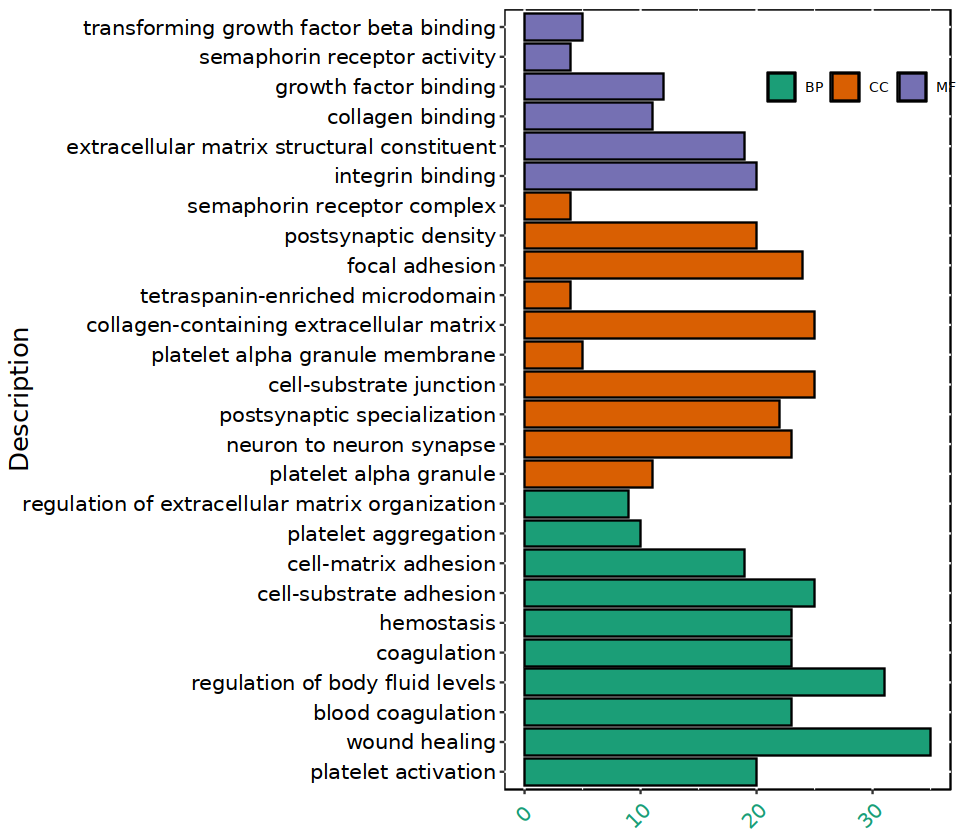

In [21]:
options(repr.plot.width = 8)

ggplot(go) +
  aes(x = Description, y = Count, fill = ONTOLOGY) + coord_flip()+
  geom_bar(stat = "identity",colour="black") +
  #scale_fill_hue() +
  scale_fill_manual(values =color)+
  theme(
    axis.title=element_text(size=15,face="plain",color="black"),
    axis.text = element_text(size=12,face="plain",color="black"),
    axis.text.x = element_text(angle = 45,colour = colorl,hjust=0.7,vjust=0.6),
    axis.title.x = element_blank(),
    legend.title = element_blank(),
    legend.text = element_text(size = 8, face = "bold"),
    legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"),
    legend.direction = "horizontal",
    legend.position = c(0.8,0.9),
    legend.background = element_blank(),
    panel.background = element_rect(fill = "transparent",colour = "black"),
    
    plot.background = element_blank()
  )
ggsave('Figure1.74sample.GO.pdf',width = 8,height = 8)

### pca

In [22]:
library(openxlsx)
data<- read.xlsx("./res/CI-CTR/bulk/74-mRNA_FPKM.genename.xlsx", sheet = 1)
library(dplyr)

Warning message:
"package 'openxlsx' was built under R version 4.2.3"


In [23]:
data = data[!duplicated(data$Gene_name),]

In [24]:

expr = data %>%  tibble::remove_rownames() %>%  dplyr::filter(Gene_name %in%  diff$GeneName) %>%  
tibble::column_to_rownames(.,'Gene_name')  
Group = c(rep('con',31),rep('CI',43))
head(expr,2)

,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,7.70851,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,20.41526,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


In [25]:
save(expr,file = 'cohort1.rda')

In [26]:
library(tinyarray)




Attaching package: 'tinyarray'


The following object is masked from 'package:dplyr':

    union_all




In [72]:
#cg=names(tail(sort(apply(expr,1,sd)),3000))
cg = jiaoji$GeneName
n=expr[cg,]

In [73]:
library(edgeR)

In [74]:
#n = cpm(log2(n+1))

In [75]:
n = n [which(rowSums(n) > 0),]

In [76]:
pca.res <- prcomp(t(n), scale. = T, center = T)  # 
pca.res

Standard deviations (1, .., p=74):
 [1] 1.499394e+01 9.334159e+00 4.479637e+00 3.923678e+00 3.765535e+00
 [6] 3.480427e+00 3.138409e+00 2.824178e+00 2.594386e+00 2.534456e+00
[11] 2.431726e+00 2.263416e+00 2.219487e+00 2.123895e+00 2.094430e+00
[16] 2.054644e+00 1.965990e+00 1.907574e+00 1.861571e+00 1.824408e+00
[21] 1.793624e+00 1.774047e+00 1.731244e+00 1.648084e+00 1.632605e+00
[26] 1.597510e+00 1.580413e+00 1.530926e+00 1.522987e+00 1.483572e+00
[31] 1.462165e+00 1.441608e+00 1.417173e+00 1.378495e+00 1.348478e+00
[36] 1.323400e+00 1.304873e+00 1.290281e+00 1.250682e+00 1.249403e+00
[41] 1.222605e+00 1.198969e+00 1.174786e+00 1.164174e+00 1.161331e+00
[46] 1.137511e+00 1.129500e+00 1.081871e+00 1.073196e+00 1.059045e+00
[51] 1.032561e+00 1.016780e+00 9.967448e-01 9.786358e-01 9.668965e-01
[56] 9.516378e-01 9.391550e-01 9.263282e-01 9.184530e-01 9.018248e-01
[61] 8.787449e-01 8.718556e-01 8.344441e-01 8.197450e-01 8.088940e-01
[66] 7.937741e-01 7.746601e-01 7.523215e-01 7.289227e-0

In [77]:
tmp <- as.data.frame(pca.res$x)
head(tmp)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C10,-11.861712,1.2841058,0.2325549,-6.62099453,2.6369077,-2.7718663,0.2280362,-4.7099625,-1.3001076,2.1083803,...,0.12161427,-0.02388885,-0.07713885,-0.1968286,0.3199583,6.742603e-05,0.1206033,-0.13552184,0.08472555,2.269018e-15
C11,1.749931,0.1888214,0.8430295,1.43457335,-1.9374682,1.5065644,-1.1834512,-0.4495708,-0.3246242,0.4282764,...,0.59731691,1.01277244,1.03374174,0.2137055,-0.4523836,5.198342e-01,0.6656912,0.57828875,0.09250341,3.441691e-15
C12,-11.658535,5.0796404,2.9158058,-0.45211374,0.8122902,-0.4853914,-1.5942061,-1.6409147,-1.3239014,0.5656242,...,-0.66497404,0.05476466,-1.18762737,0.9322233,0.3744397,1.028899e-01,0.1604666,0.75130681,0.47534916,1.554312e-15
C13,-4.165184,-4.5550020,-0.5512364,3.81855610,-5.2360698,1.3783453,-0.2340505,-1.5963299,-1.3099037,1.6843183,...,0.47366728,-0.13793080,-0.23140996,-0.5136701,-0.2875376,4.741629e-01,-0.1423219,-0.07483662,-0.14532136,3.275158e-15
C14,-20.266129,-0.7007710,-4.0762536,0.08230007,-1.3458615,5.4222341,-2.6999890,1.5799599,-1.0564453,-2.7544154,...,-0.05333749,-0.11588764,-0.38108728,-0.5265399,-0.4187054,1.082348e-01,-0.6853798,-0.18817552,-0.06815028,5.467848e-15
C15,-27.260411,2.9190917,2.6378155,-0.35516622,5.6760433,-3.7102090,2.1815398,-1.4129065,-1.5746465,3.7619675,...,-0.42787801,-0.83469285,0.15015008,0.2426672,0.3437498,4.418512e-01,-0.2581153,0.22199563,0.26363412,2.609024e-15


In [78]:
tmp$group <- Group
head(tmp)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C10,-11.861712,1.2841058,0.2325549,-6.62099453,2.6369077,-2.7718663,0.2280362,-4.7099625,-1.3001076,2.1083803,...,-0.02388885,-0.07713885,-0.1968286,0.3199583,6.742603e-05,0.1206033,-0.13552184,0.08472555,2.269018e-15,con
C11,1.749931,0.1888214,0.8430295,1.43457335,-1.9374682,1.5065644,-1.1834512,-0.4495708,-0.3246242,0.4282764,...,1.01277244,1.03374174,0.2137055,-0.4523836,5.198342e-01,0.6656912,0.57828875,0.09250341,3.441691e-15,con
C12,-11.658535,5.0796404,2.9158058,-0.45211374,0.8122902,-0.4853914,-1.5942061,-1.6409147,-1.3239014,0.5656242,...,0.05476466,-1.18762737,0.9322233,0.3744397,1.028899e-01,0.1604666,0.75130681,0.47534916,1.554312e-15,con
C13,-4.165184,-4.5550020,-0.5512364,3.81855610,-5.2360698,1.3783453,-0.2340505,-1.5963299,-1.3099037,1.6843183,...,-0.13793080,-0.23140996,-0.5136701,-0.2875376,4.741629e-01,-0.1423219,-0.07483662,-0.14532136,3.275158e-15,con
C14,-20.266129,-0.7007710,-4.0762536,0.08230007,-1.3458615,5.4222341,-2.6999890,1.5799599,-1.0564453,-2.7544154,...,-0.11588764,-0.38108728,-0.5265399,-0.4187054,1.082348e-01,-0.6853798,-0.18817552,-0.06815028,5.467848e-15,con
C15,-27.260411,2.9190917,2.6378155,-0.35516622,5.6760433,-3.7102090,2.1815398,-1.4129065,-1.5746465,3.7619675,...,-0.83469285,0.15015008,0.2426672,0.3437498,4.418512e-01,-0.2581153,0.22199563,0.26363412,2.609024e-15,con


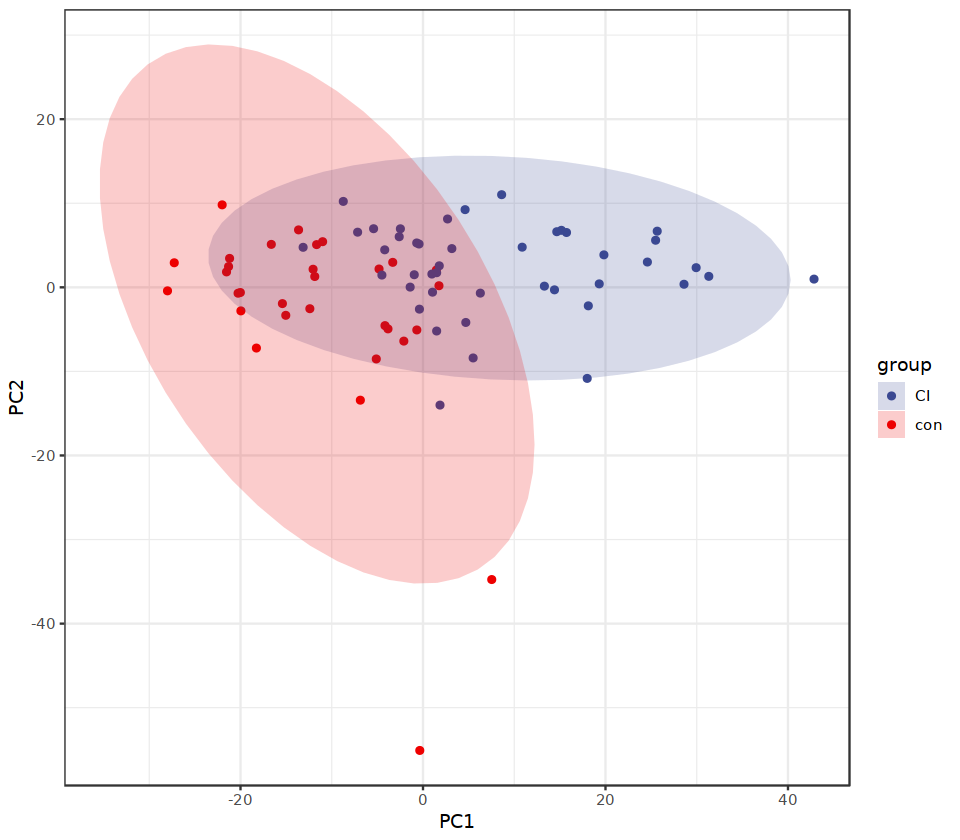

In [79]:
library(ggplot2)
library(ggsci)

ggplot(tmp, aes(PC1, PC2))+
  geom_point(aes(color = group))+
  stat_ellipse(aes(fill=group), alpha = 0.2,
               geom ="polygon",type = "norm")+
  scale_fill_aaas()+
  scale_color_aaas()+
  theme_bw()
ggsave('Figure1.74sample.pca.pdf',width = 8,height = 8)